In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime

In [7]:
data = pd.read_csv('swap_rates.csv')
data = data[['Start Date', 'EMA']]
data

dtype('float64')

In [19]:
dummytrades = pd.read_csv('final_feature_results.csv')
dummytrades

,trade name,pay_frequency,maturity,lower_bound,upper_bound,Daily_Diff_STD,Weekly_Diff_STD,Monthly_Diff_STD,Mean_CMS,STD_CMS,Max_CMS,Min_CMS,Proportion_Within_Range
0,dummyTrade1,2,5,0.0042,0.0379,0.332305,0.194263,0.476413,2.451733,0.770452,4.239414,0.251352,0.966822
1,dummyTrade2,3,5,0.0042,0.0379,0.332305,0.194263,0.476413,2.451733,0.770452,4.239414,0.251352,0.966822
2,dummyTrade3,2,5,0.0044,0.0397,0.311437,0.184641,0.457632,2.487190,0.696338,4.239429,0.616615,0.989692
3,dummyTrade4,3,5,0.0044,0.0397,0.311437,0.184641,0.457632,2.487190,0.696338,4.239429,0.616615,0.989692
4,dummyTrade5,3,5,0.0046,0.0417,0.307127,0.181332,0.450734,2.488097,0.639738,4.173166,1.042757,0.999839
5,dummyTrade6,4,5,0.0046,0.0417,0.307127,0.181332,0.450734,2.488097,0.639738,4.173166,1.042757,0.999839
6,dummyTrade7,2,10,0.0042,0.0379,0.332305,0.194263,0.476413,2.451733,0.770452,4.239414,0.251352,0.966822
7,dummyTrade8,3,10,0.0042,0.0379,0.332305,0.194263,0.476413,2.451733,0.770452,4.239414,0.251352,0.966822
8,dummyTrade9,2,10,0.0044,0.0397,0.311437,0.184641,0.457632,2.487190,0.696338,4.239429,0.616615,0.989692
9,dummyTrade10,3,10,0.0044,0.0397,0.311437,0.184641,0.457632,2.487190,0.696338,4.239429,0.616615,0.989692


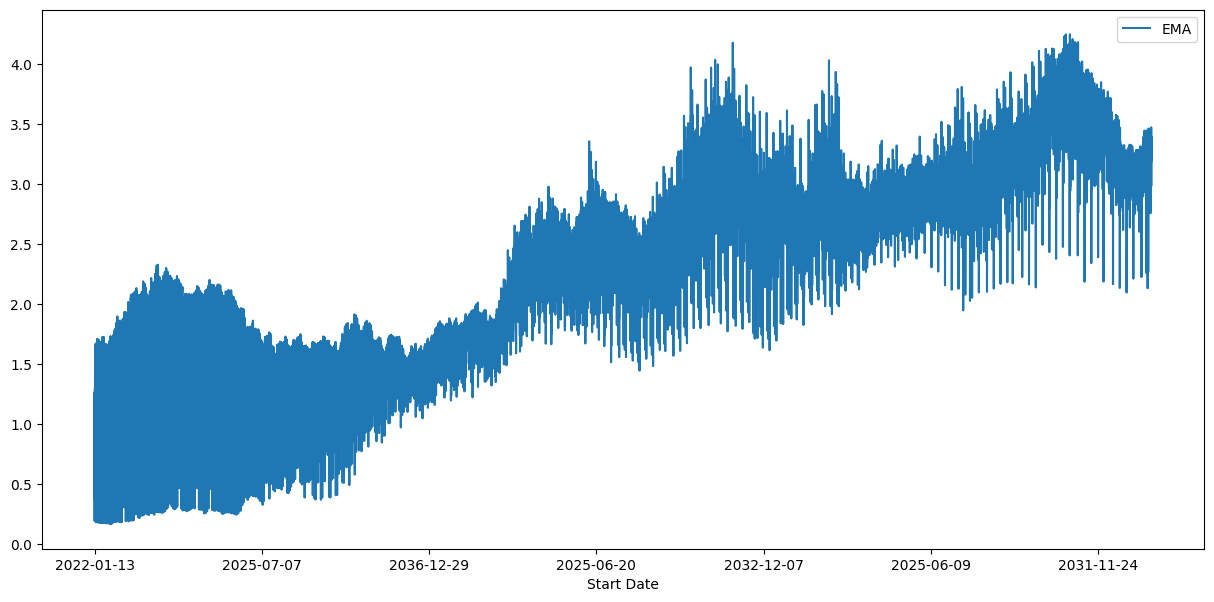

In [26]:
data.plot(y='EMA',x='Start Date', figsize=(15, 7))
plt.show()

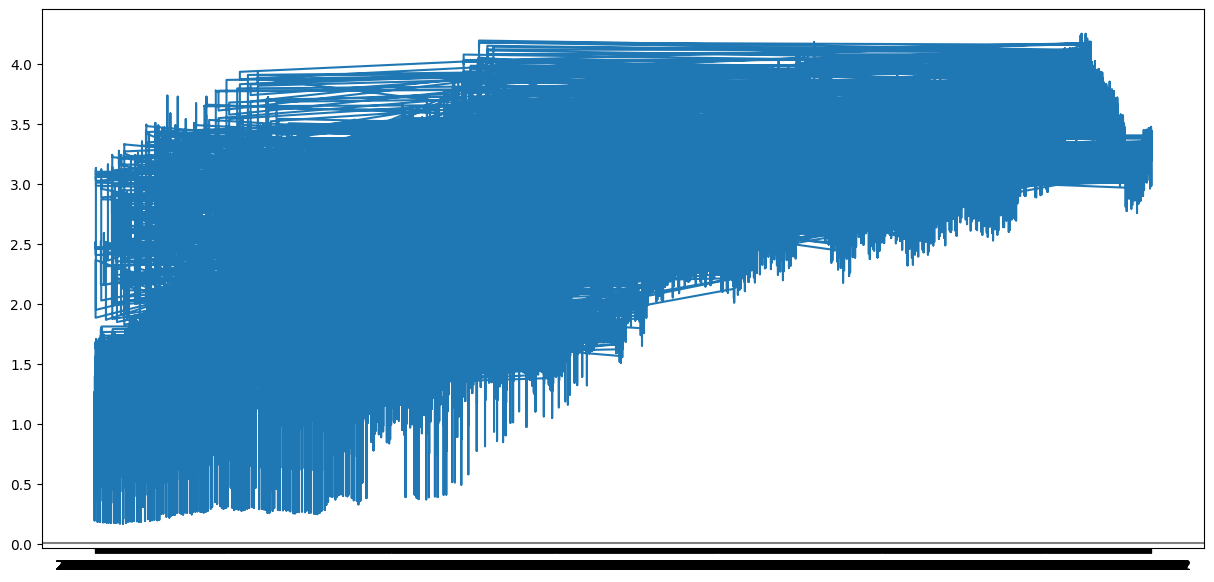

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(data['Start Date'], data['EMA'], label='EMA')
plt.axhline(0.0042,color='gray', label='lower bound')
#plt.hline(0.0379, datetime.date(2022,1,13), datetime.date(2031,11,24), linestyles='--', colors='gray', label='upper bound')
plt.show()

### Take Fourier transform

In [12]:
EMA_fft = np.fft.fft(np.asarray(data['EMA'].tolist()))
fft_df = pd.DataFrame({'fft':EMA_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
#fft_df.sort_values(by=['abs'], ascending=False, inplace=True)
#fft_df.reset_index(inplace=True)
#fft_df.drop(columns=['index'], inplace=True)
fft_df.head(n=20)

,fft,absolute,angle
0,151396.964832+ 0.000000j,151396.964832,0.000000
1,-677.570076+ 27828.888474j,27837.135896,1.595139
2,6502.855554+ 9068.466646j,11159.041969,0.948696
3,-1509.291814+ 7642.409747j,7790.018519,1.765776
4,-3535.267614+ 5872.033072j,6854.114786,2.112723
5,-1806.323019+ 2333.297924j,2950.776517,2.229575
6,-4888.361766+ 4292.070491j,6505.224812,2.421056
7,-286.201162+ 1486.260438j,1513.565722,1.761032
8,-1900.885897+ 3103.234419j,3639.152518,2.120393
9,-233.689183- 461.273227j,517.091504,-2.039724


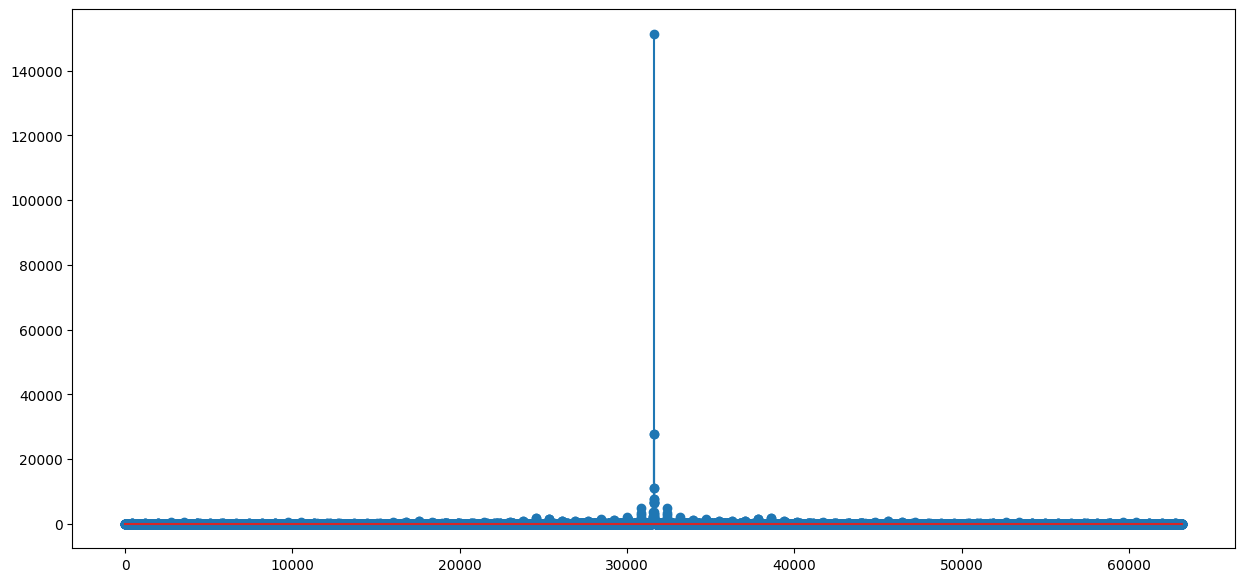

In [13]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(15, 7))
plt.stem(items)
plt.show()

### Reproducing the signal

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


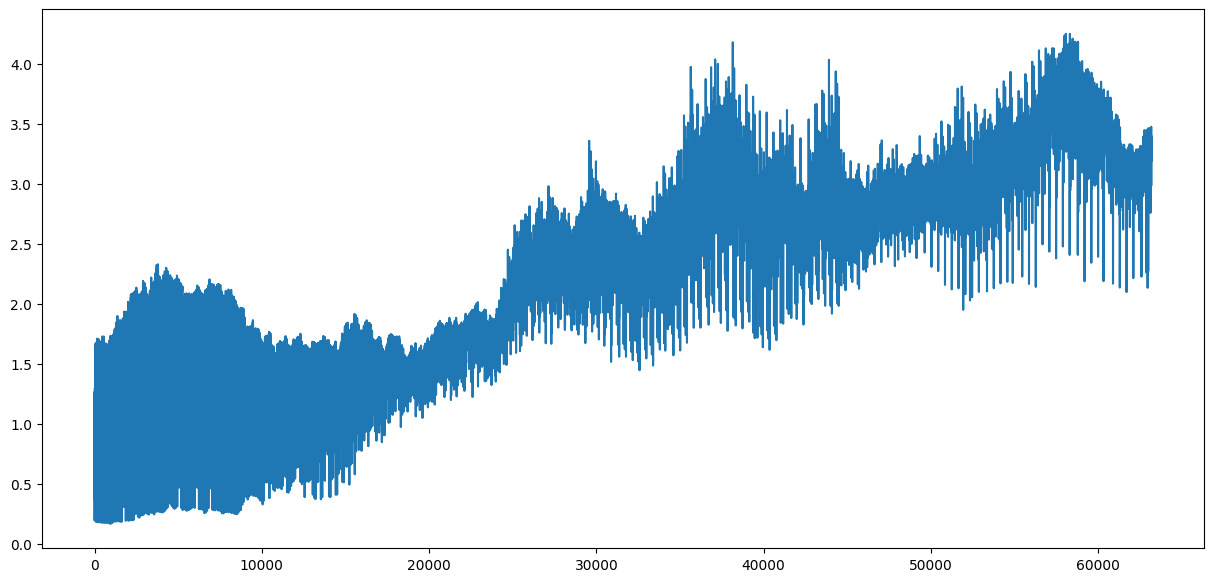

In [14]:
# take all components

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(np.asarray(fft_df['fft'].tolist())))
plt.show()

### Low-pass filtering

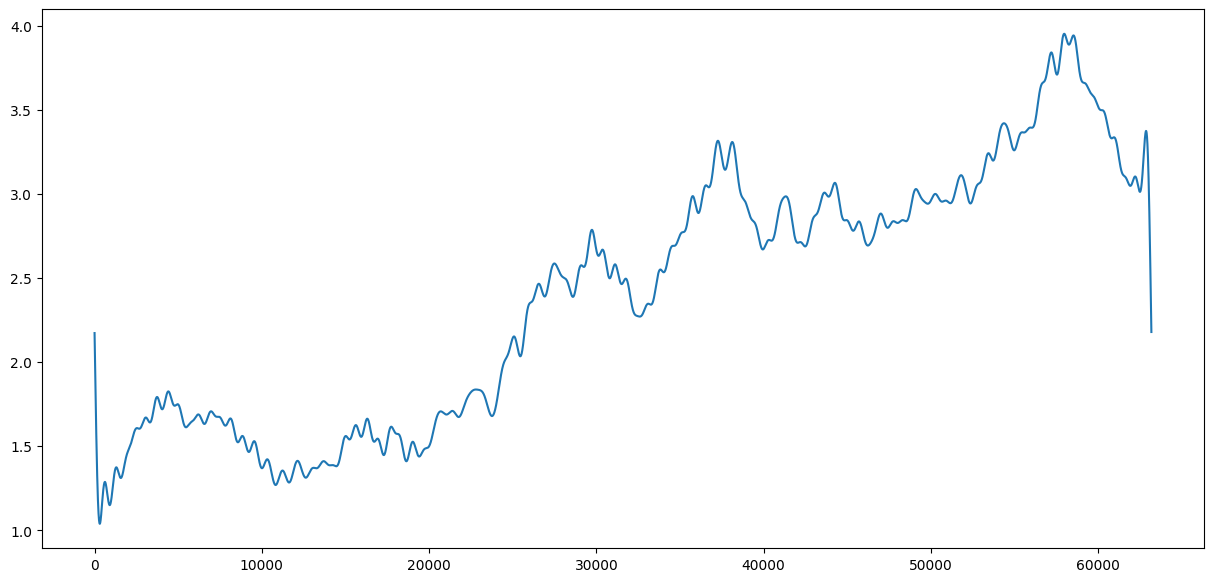

In [15]:
# take only 200 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[100:-100] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

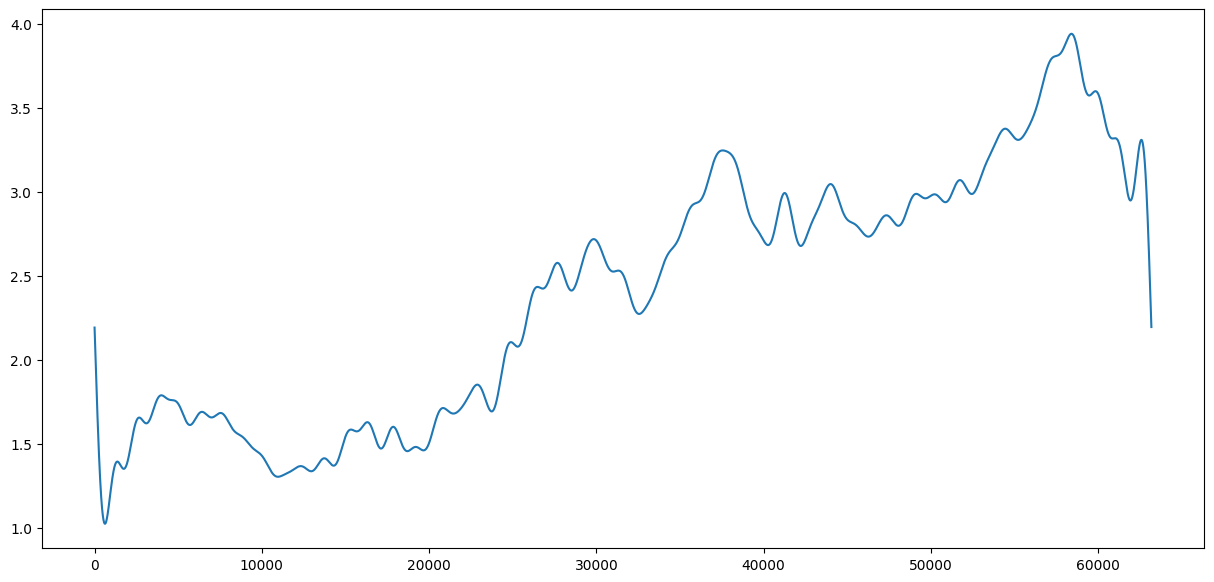

In [16]:
# take only 100 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[50:-50] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

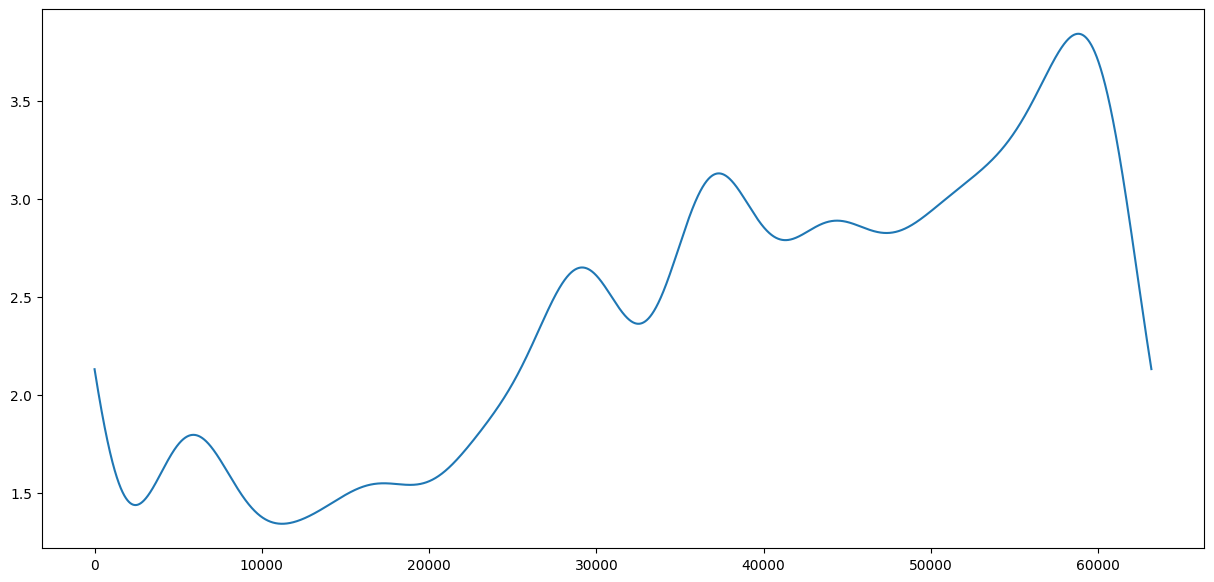

In [17]:
# take only 20 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[10:-10] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

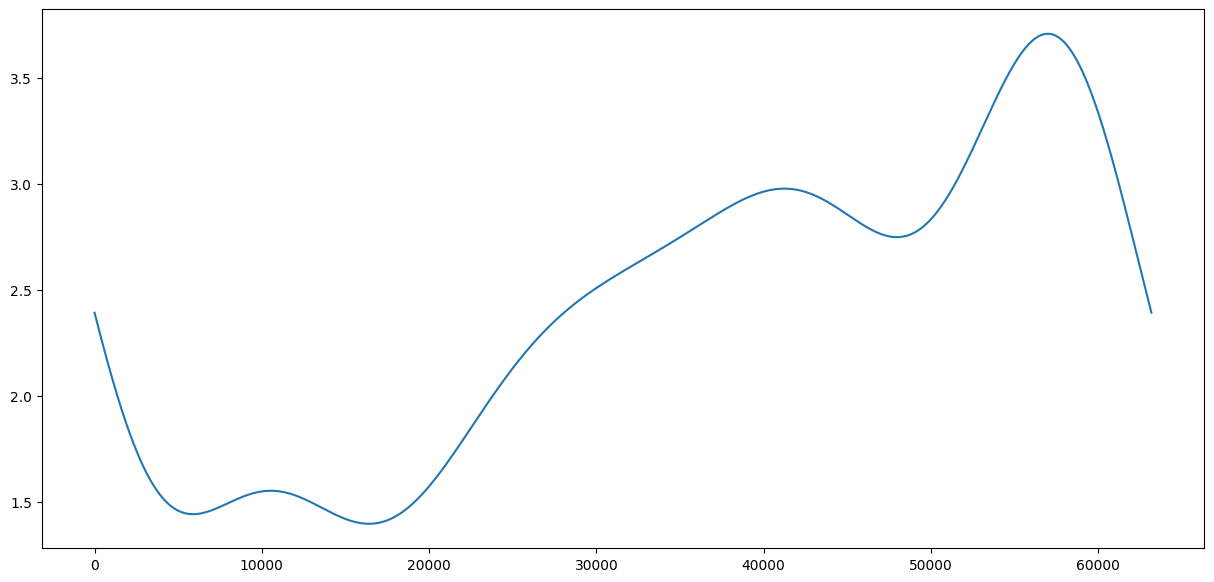

In [18]:
# take only 10 components

fft_list = np.asarray(fft_df['fft'].tolist())
fft_list[5:-5] = 0

plt.figure(figsize=(15, 7))
plt.plot(np.fft.ifft(fft_list))
plt.show()

## Fast Fourier Transform

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
merged_data = pd.read_csv('merged_data2.csv')

In [12]:
merged_data

,Value Date,Trade Name,Trade Currency,Zero Rate Shock,TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,underlying,pay_frequency,maturity,lower_bound,upper_bound
0,2022-09-02,dummyTrade1,USD,-100,-227907.098775,1y,2023-09-04,10y,1.962246,USD: CMS:2Y,0.500,NaN,0.0042,0.0379
1,2022-09-02,dummyTrade1,USD,-50,-222208.400967,1y,2023-09-04,10y,-3.812341,USD: CMS:2Y,0.500,NaN,0.0042,0.0379
2,2022-09-02,dummyTrade1,USD,-25,-218960.927995,1y,2023-09-04,10y,4.471006,USD: CMS:2Y,0.500,NaN,0.0042,0.0379
3,2022-09-02,dummyTrade1,USD,-10,-216872.430106,1y,2023-09-04,10y,4.333398,USD: CMS:2Y,0.500,NaN,0.0042,0.0379
4,2022-09-02,dummyTrade1,USD,-5,-216146.310328,1y,2023-09-04,10y,5.679687,USD: CMS:2Y,0.500,NaN,0.0042,0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-09-02,dummyTrade2,USD,100,-190159.219652,10y,2032-09-02,4y,-0.176927,USD: CMS:2Y,0.333,NaN,0.0042,0.0379
9996,2022-09-02,dummyTrade3,USD,-100,-226544.459466,10y,2032-09-02,4y,-0.380483,USD: CMS:5Y,0.500,NaN,0.0044,0.0397
9997,2022-09-02,dummyTrade3,USD,-50,-221205.410810,10y,2032-09-02,4y,-0.438437,USD: CMS:5Y,0.500,NaN,0.0044,0.0397
9998,2022-09-02,dummyTrade3,USD,-25,-217879.517567,10y,2032-09-02,4y,-0.362203,USD: CMS:5Y,0.500,NaN,0.0044,0.0397


In [49]:
merged_data.drop(['Trade Currency','maturity'], axis = 1)

,Value Date,Trade Name,Zero Rate Shock,TV,Expiry Bucket,Expiry Date,Tenor Bucket,Vega,underlying,pay_frequency,lower_bound,upper_bound
0,2022-09-02,dummyTrade1,-100,-227907.098775,1y,2023-09-04,10y,1.962246,USD: CMS:2Y,0.5,0.0042,0.0379
1,2022-09-02,dummyTrade1,-50,-222208.400967,1y,2023-09-04,10y,-3.812341,USD: CMS:2Y,0.5,0.0042,0.0379
2,2022-09-02,dummyTrade1,-25,-218960.927995,1y,2023-09-04,10y,4.471006,USD: CMS:2Y,0.5,0.0042,0.0379
3,2022-09-02,dummyTrade1,-10,-216872.430106,1y,2023-09-04,10y,4.333398,USD: CMS:2Y,0.5,0.0042,0.0379
4,2022-09-02,dummyTrade1,-5,-216146.310328,1y,2023-09-04,10y,5.679687,USD: CMS:2Y,0.5,0.0042,0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...
3919099,2024-01-12,dummyTrade9,10,-547852.055930,15y,2039-01-12,8y,5.007952,USD: CMS:5Y,0.5,0.0044,0.0397
3919100,2024-01-12,dummyTrade9,25,-521228.587618,15y,2039-01-12,8y,5.131505,USD: CMS:5Y,0.5,0.0044,0.0397
3919101,2024-01-12,dummyTrade9,50,-464905.982097,15y,2039-01-12,8y,3.348622,USD: CMS:5Y,0.5,0.0044,0.0397
3919102,2024-01-12,dummyTrade9,75,-391315.041929,15y,2039-01-12,8y,1.063634,USD: CMS:5Y,0.5,0.0044,0.0397


In [50]:
vega_values = merged_data['Vega'].values
vega_values

array([ 1.96224604, -3.81234111,  4.47100553, ...,  3.34862196,
        1.06363422, -5.71580755])

In [51]:
# Apply Fourier Transform
fft_values = np.fft.fft(vega_values)
fft_values

array([67193477.44443348      +0.j        ,
        1323484.89321128-3888088.34438477j,
        4740856.76866084-6759989.08552594j, ...,
        1322417.57190663-2244211.02723235j,
        4740856.76866084+6759989.08552593j,
        1323484.89321127+3888088.34438477j])

In [52]:
# Get frequencies
frequencies = np.fft.fftfreq(len(vega_values))
frequencies

array([ 0.00000000e+00,  2.55160363e-07,  5.10320726e-07, ...,
       -7.65481090e-07, -5.10320726e-07, -2.55160363e-07])

In [53]:
# Keep only significant frequencies (e.g., filter out small amplitudes)
significant_fft_values = np.where(np.abs(fft_values) > 1e-5, fft_values, 0)

# Apply Inverse Fourier Transform
predicted_vega = np.fft.ifft(significant_fft_values).real
predicted_vega 

array([ 1.96224604, -3.81234111,  4.47100553, ...,  3.34862196,
        1.06363422, -5.71580755])

In [54]:
# Compute accuracy metrics
mse = mean_squared_error(vega_values, predicted_vega)
mae = mean_absolute_error(vega_values, predicted_vega)
r2 = r2_score(vega_values, predicted_vega)

In [55]:
mse

1.944866994038689e-24

In [56]:
mae

6.722439052110958e-13

In [57]:
r2

1.0

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequentials
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

In [ ]:
df = pd.DataFrame(data)

# Extract Vega values


# Apply Fourier Transform
fft_values = np.fft.fft(vega_values)

# Get frequencies
frequencies = np.fft.fftfreq(len(vega_values))

# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, np.abs(fft_values))
plt.title('Amplitude Spectrum of Vega')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Keep only significant frequencies (e.g., filter out small amplitudes)
significant_fft_values = np.where(np.abs(fft_values) > 1e-5, fft_values, 0)

# Apply Inverse Fourier Transform
predicted_vega = np.fft.ifft(significant_fft_values)

# Plot the original and predicted values
plt.figure(figsize=(10, 6))
plt.plot(vega_values, label='Original Vega')
plt.plot(predicted_vega.real, label='Predicted Vega', linestyle='--')
plt.title('Original and Predicted Vega using DFT')
plt.xlabel('Time')
plt.ylabel('Vega')
plt.legend()
plt.grid()
plt.show()